# 13 차시 - 본문 실습

## 한국은행 오픈 API 

## 100대 통계지표 (KeyStatisticList)

In [12]:
api_key = 'QKDE3D49GGBIS42GXXXX' # 발급받은 인증키를 사용해야 합니다.

In [13]:
import requests
import json
import pandas as pd

url = 'http://ecos.bok.or.kr/api/KeyStatisticList/{}/json/kr/1/100'.format(api_key)
   
r = requests.get(url)
jo = json.loads(r.text)

result = pd.json_normalize(jo['KeyStatisticList']['row'])
result

,CLASS_NAME,UNIT_NAME,CYCLE,KEYSTAT_NAME,DATA_VALUE
0,국민소득 · 경기 · 기업경영,%,"2020,1/4","경제성장률(실질, 계절조정 전기대비)",-1.300000e+00
1,국민소득 · 경기 · 기업경영,%,"2020,1/4","민간소비증감률(실질, 계절조정 전기대비)",-6.500000e+00
2,국민소득 · 경기 · 기업경영,%,"2020,1/4","설비투자증감률(실질, 계절조정 전기대비)",2.000000e-01
3,국민소득 · 경기 · 기업경영,%,"2020,1/4","건설투자증감률(실질, 계절조정 전기대비)",5.000000e-01
4,국민소득 · 경기 · 기업경영,십억원,"2020,1/4","GDP(명목, 계절조정)",4.768053e+05
...,...,...,...,...,...
95,경제관련 사회통계,%,2067,고령인구비율(65세 이상),4.650000e+01
96,경제관련 사회통계,명,2019,합계출산율,9.200000e-01
97,경제관련 사회통계,대,2020.05,자동차등록대수,2.392608e+07
98,경제관련 사회통계,%,2018,주택보급률,1.042000e+02


## 통계 조회 조건 설정 (StatisticSearch)
데이터 이용을 위한 조회조건 설정(통계코드, 통계명, 세부항목명, 기간 등)

요청예: http://ecos.bok.or.kr/api/StatisticSearch/sample/json/kr/1/10/010Y002/MM/201101/201608/

요청예: http://ecos.bok.or.kr/api/StatisticSearch/인증키/요청타입/언어/요청시작건수/요청종료건수/통계코드/주기/검색시작일자/검색종료일자/

In [14]:
statcode = '043Y070' # 통계코드(지역별 소비유형별 개인 신용카드)
freq = 'MM'
start = '201101'
end = '201608'

url_tmpl = 'http://ecos.bok.or.kr/api/StatisticSearch/{}/json/kr/1/100/{}/{}/{}/{}'
url = url_tmpl.format(api_key, statcode, freq, start, end)

r = requests.get(url)
jo = json.loads(r.text)

result = pd.json_normalize(jo['StatisticSearch']['row'])
result

,UNIT_NAME,STAT_NAME,ITEM_CODE1,STAT_CODE,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,DATA_VALUE,ITEM_NAME3,TIME
0,백만원,5.8.2 지역별 소비유형별 개인 신용카드,X,043Y070,1000,TOT,전국,합계,25425990,총액,201101
1,백만원,5.8.2 지역별 소비유형별 개인 신용카드,X,043Y070,1000,TOT,전국,합계,22568812,총액,201102
2,백만원,5.8.2 지역별 소비유형별 개인 신용카드,X,043Y070,1000,TOT,전국,합계,26279736,총액,201103
3,백만원,5.8.2 지역별 소비유형별 개인 신용카드,X,043Y070,1000,TOT,전국,합계,25368425,총액,201104
4,백만원,5.8.2 지역별 소비유형별 개인 신용카드,X,043Y070,1000,TOT,전국,합계,27252492,총액,201105
...,...,...,...,...,...,...,...,...,...,...,...
95,백만원,5.8.2 지역별 소비유형별 개인 신용카드,X,043Y070,1000,DAV,전국,합계,989218,월간 일평균,201304
96,백만원,5.8.2 지역별 소비유형별 개인 신용카드,X,043Y070,1000,DAV,전국,합계,1001376,월간 일평균,201305
97,백만원,5.8.2 지역별 소비유형별 개인 신용카드,X,043Y070,1000,DAV,전국,합계,961979,월간 일평균,201306
98,백만원,5.8.2 지역별 소비유형별 개인 신용카드,X,043Y070,1000,DAV,전국,합계,1018960,월간 일평균,201307


# 한국은행 OpenAPI - 활용하기

사례: 소비자 물가지수와 생산자 물가지수

`생산자물가지수`와 `소비자물가지수`의 통계코드는 아래와 같습니다. 
* I10Y021 생산자물가지수
* I10Y022 소비자물가지수




In [15]:
api_key = 'QKDE3D49GGBIS42GXXXX' # 발급받은 인증키를 사용해야 합니다.

In [16]:
import requests
import json
import pandas as pd

statcode = 'I10Y021' # I10Y021: 생산자물가지수, I10Y022: 소비자물가지수
freq, start, end, item1 = 'MM', '200001', '202005', 'KR'

url_tmpl = 'http://ecos.bok.or.kr/api/StatisticSearch/{}/json/kr/1/10000/{}/{}/{}/{}/{}'
url = url_tmpl.format(api_key, statcode, freq, start, end, item1)

r = requests.get(url)
jo = json.loads(r.text)

result = pd.json_normalize(jo['StatisticSearch']['row'])
result

,UNIT_NAME,STAT_NAME,ITEM_CODE1,STAT_CODE,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,DATA_VALUE,ITEM_NAME3,TIME
0,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,79.52,,200001
1,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,79.32,,200002
2,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,79.27,,200003
3,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,78.88,,200004
4,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,78.69,,200005
...,...,...,...,...,...,...,...,...,...,...,...
238,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,104.39,,201911
239,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,104.68,,201912
240,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,105.07,,202001
241,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,104.73,,202002


In [17]:
## 함수로 만들기 
import requests
import json
import pandas as pd

def query_ecos(statcode, freq, start, end, item1='KR'):
    url_tmpl = 'http://ecos.bok.or.kr/api/StatisticSearch/{}/json/kr/1/10000/{}/{}/{}/{}/{}'
    url = url_tmpl.format(api_key, statcode, freq, start, end, item1)

    r = requests.get(url)
    if '해당하는 데이터가 없습니다' in r.text:
        return None

    jo = json.loads(r.text)
    df = pd.json_normalize(jo['StatisticSearch']['row'])

    df['DATA_VALUE'] = df['DATA_VALUE'].astype(float)
    df['TIME'] = df['TIME'] + '01'
    df['TIME'] = pd.to_datetime(df['TIME'])
    return df

In [18]:
# I10Y021: 생산자물가지수(Producers Price Index, PPI)

ppi = query_ecos('I10Y021', 'MM', '201001', '202005')
ppi.set_index('TIME', inplace=True)
ppi

,UNIT_NAME,STAT_NAME,ITEM_CODE1,STAT_CODE,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,DATA_VALUE,ITEM_NAME3
TIME,,,,,,,,,,
2010-01-01,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,97.63,
2010-02-01,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,97.80,
2010-03-01,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,98.25,
2010-04-01,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,98.97,
2010-05-01,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,99.81,
...,...,...,...,...,...,...,...,...,...,...
2019-11-01,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,104.39,
2019-12-01,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,104.68,
2020-01-01,2010=100,18.1.2.1 생산자물가지수,KR,I10Y021,,,한국,,105.07,


In [19]:
# I10Y022: 소비자물가지수(Consumer Price Index, CPI)

cpi = query_ecos('I10Y022', 'MM', '201001', '202005')
cpi.set_index('TIME', inplace=True)
cpi

,UNIT_NAME,STAT_NAME,ITEM_CODE1,STAT_CODE,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,DATA_VALUE,ITEM_NAME3
TIME,,,,,,,,,,
2010-01-01,2010=100,18.1.2.2 소비자물가지수,KR,I10Y022,,,한국,,98.82,
2010-02-01,2010=100,18.1.2.2 소비자물가지수,KR,I10Y022,,,한국,,99.02,
2010-03-01,2010=100,18.1.2.2 소비자물가지수,KR,I10Y022,,,한국,,99.22,
2010-04-01,2010=100,18.1.2.2 소비자물가지수,KR,I10Y022,,,한국,,99.62,
2010-05-01,2010=100,18.1.2.2 소비자물가지수,KR,I10Y022,,,한국,,99.72,
...,...,...,...,...,...,...,...,...,...,...
2020-01-01,2010=100,18.1.2.2 소비자물가지수,KR,I10Y022,,,한국,,116.19,
2020-02-01,2010=100,18.1.2.2 소비자물가지수,KR,I10Y022,,,한국,,116.20,
2020-03-01,2010=100,18.1.2.2 소비자물가지수,KR,I10Y022,,,한국,,115.91,


In [20]:
merged = pd.DataFrame()
merged['PPI'] = ppi['DATA_VALUE']
merged['CPI'] = cpi['DATA_VALUE']
merged

,PPI,CPI
TIME,,
2010-01-01,97.63,98.82
2010-02-01,97.80,99.02
2010-03-01,98.25,99.22
2010-04-01,98.97,99.62
2010-05-01,99.81,99.72
...,...,...
2019-11-01,104.39,115.18
2019-12-01,104.68,115.45
2020-01-01,105.07,116.19


In [21]:
%matplotlib inline

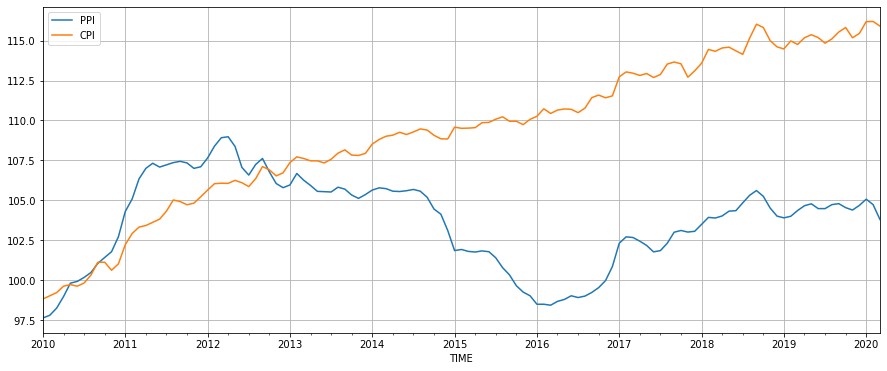

In [22]:
merged.plot(figsize=(15,6), grid=True)

관련 뉴스
* https://www.hankyung.com/economy/article/201602195212g 올 1월 국내 생산자물가, 5년 10개월 만에 최저
* https://www.fnnews.com/news/201602191756068102 양파·마늘·소고기 등 장바구니 물가 급등

# 전자공시(DART) 오픈API - 사용하기


In [23]:
import requests
import json
import pandas as pd

CERT_KEY = 'd81e78ca611d1e1e2ed7887ef22e737a66cb64c7'

corp_code = '00126380' # 삼성전자 기업코드
url = 'https://opendart.fss.or.kr/api/list.json'
params = {
    'crtfc_key': CERT_KEY,
    'corp_code': corp_code,
    'bgn_de': '20190101',
    'end_de': '20191231',
    'last_reprt_at': 'Y', # 최종보고서
    'pblntf_ty': 'A', # 정기공시(A)
    'pblntf_detail_ty': '',
    'page_no': 1,
    'page_count': 100,
}

r = requests.get(url, params=params)
jo = json.loads(r.text)
df = pd.json_normalize(jo, 'list')
df

,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm
0,00126380,삼성전자,005930,Y,분기보고서 (2019.09),20191114001273,삼성전자,20191114,
1,00126380,삼성전자,005930,Y,반기보고서 (2019.06),20190814002218,삼성전자,20190814,
2,00126380,삼성전자,005930,Y,분기보고서 (2019.03),20190515001605,삼성전자,20190515,
3,00126380,삼성전자,005930,Y,사업보고서 (2018.12),20190401004781,삼성전자,20190401,연


## 공시정보 - 기업개황 구현
url : https://opendart.fss.or.kr/api/company.json

고유번호로 조회

### 요청인자

키 | 명칭 | 타입 | 필수여부 | 값설명
--- | --- | --- | --- | ---
crtfc_key | API 인증키 | STRING(40) | Y | 발급받은 인증키(40자리)
corp_code | 고유번호 | STRING(8) | Y | 공시대상회사의 고유번호(8자리)

In [24]:
CERT_KEY = 'd81e78ca611d1e1e2ed7887ef22e737a66cb64c7'

In [25]:
import json
import requests

corp_code = '00126380'

url = 'https://opendart.fss.or.kr/api/company.json'
params = {
  'crtfc_key': CERT_KEY,
  'corp_code': corp_code,
}

r = requests.get(url, params=params)
jo = json.loads(r.text)
jo

{'status': '000',
 'message': '정상',
 'corp_code': '00126380',
 'corp_name': '삼성전자(주)',
 'corp_name_eng': 'SAMSUNG ELECTRONICS CO,.LTD',
 'stock_name': '삼성전자',
 'stock_code': '005930',
 'ceo_nm': '김기남, 김현석, 고동진',
 'corp_cls': 'Y',
 'jurir_no': '1301110006246',
 'bizr_no': '1248100998',
 'adres': '경기도 수원시 영통구  삼성로 129 (매탄동)',
 'hm_url': 'www.sec.co.kr',
 'ir_url': '',
 'phn_no': '031-200-1114',
 'fax_no': '031-200-7538',
 'induty_code': '264',
 'est_dt': '19690113',
 'acc_mt': '12'}

## OpenDartReader 사용하기

https://github.com/FinanceData/OpenDartReader 

금융감독원 전자공시 시스템의 "Open DART"서비스 API를 손쉽게 사용할 수 있도록 돕는 오픈소스 라이브러리


```bash
pip install OpenDartReader
```

In [30]:
CERT_KEY = 'd81e78ca611d1e1e2ed7887ef22e737a66cb64c7'

In [31]:
import OpenDartReader
dart = OpenDartReader(CERT_KEY) 

## 1. 공시정보 검색

```python
# 삼성전자의 정기보고서('A') 2019년
dart.list('005930', kind='A', start='2019-01-01', end='2019-12-31')

# 삼성전자의 모든 공시 리스트 (1999년 ~ 현재)
dart.list('005930') 

# 기업의 개황정보
dart.company('005930')

# 회사명에 삼성전자가 포함된 회사들에 대한 개황정보
dart.company_by_name('삼성전자')

# 삼성전자 사업보고서 (2018.12) 원문 텍스트
xml_text = dart.document('20190401004781')
```


In [32]:
dart.list('005930', kind='A', start='2019-01-01', end='2019-12-31')

,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm
0,00126380,삼성전자,005930,Y,분기보고서 (2019.09),20191114001273,삼성전자,20191114,
1,00126380,삼성전자,005930,Y,반기보고서 (2019.06),20190814002218,삼성전자,20190814,
2,00126380,삼성전자,005930,Y,분기보고서 (2019.03),20190515001605,삼성전자,20190515,
3,00126380,삼성전자,005930,Y,사업보고서 (2018.12),20190401004781,삼성전자,20190401,연


In [33]:
dart.company('005930')

{'status': '000',
 'message': '정상',
 'corp_code': '00126380',
 'corp_name': '삼성전자(주)',
 'corp_name_eng': 'SAMSUNG ELECTRONICS CO,.LTD',
 'stock_name': '삼성전자',
 'stock_code': '005930',
 'ceo_nm': '김기남, 김현석, 고동진',
 'corp_cls': 'Y',
 'jurir_no': '1301110006246',
 'bizr_no': '1248100998',
 'adres': '경기도 수원시 영통구  삼성로 129 (매탄동)',
 'hm_url': 'www.sec.co.kr',
 'ir_url': '',
 'phn_no': '031-200-1114',
 'fax_no': '031-200-7538',
 'induty_code': '264',
 'est_dt': '19690113',
 'acc_mt': '12'}

In [34]:
dart.attach_files('20190401004781')

[('PDF',
  'http://dart.fss.or.kr/pdf/download/pdf.do?rcp_no=20190401004781&dcm_no=6616741&lang=ko'),
 ('XLS',
  'http://dart.fss.or.kr/pdf/download/excel.do?rcp_no=20190401004781&dcm_no=6616741&lang=ko'),
 ('ZIP',
  'http://dart.fss.or.kr/pdf/download/ifrs.do?rcp_no=20190401004781&dcm_no=6616741&lang=ko')]

## 2. 사업보고서
```python
# 삼성전자(005930), 배당관련 사항, 2018년
dart.report('005930', '배당', 2018) 

# 서울반도체(046890), 최대주주 관한 사항, 2018년
dart.report('046890', '최대주주', 2018) 

# 서울반도체(046890), 임원 관한 사항, 2018년
dart.report('046890', '임원', 2018) 
```



## 3. 상장기업 재무정보
```python
# 삼성전자 2018 재무제표
dart.finstate('삼성전자', 2018) # 사업보고서

# 삼성전자 2018Q1 재무제표
dart.finstate('삼성전자', 2018, reprt_code='11013')
```

## 4. 지분공시
```python
# 대량보유 상황보고 (종목코드, 종목명, 고유번호 모두 지정 가능)
dart.major_shareholders('삼성전자')

# 임원ㆍ주요주주 소유보고 (종목코드, 종목명, 고유번호 모두 지정 가능)
dart.major_shareholders_exec('005930')
```

